## 7.3 Network in Network(NiN)
### 7.3.1 NiN Blocks

In [1]:
from d2l import mxnet as d2l
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()

In [10]:
def nin_block(num_channels, kernel_size, strides, padding):
    blk = nn.Sequential()
    blk.add(nn.Conv2D(num_channels, kernel_size, strides, padding, activation='relu'),
            nn.Conv2D(num_channels, kernel_size=1, activation='relu'),
            nn.Conv2D(num_channels, kernel_size=1, activation='relu'),
            nn.Conv2D(num_channels, kernel_size=1, activation='relu'))
    return blk

In [11]:
net = nn.Sequential()
net.add(nin_block(96, kernel_size=11, strides=4, padding=0),
        nn.MaxPool2D(pool_size=3, strides=2),
        nin_block(384, kernel_size=5, strides=1, padding=2),
        nn.MaxPool2D(pool_size=3, strides=2),
        nin_block(1536, kernel_size=3, strides=1, padding=1),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Dropout(0.5),
        # There are 10 label classes
        nin_block(10, kernel_size=3, strides=1, padding=1),
        # The global average pooling layer automatically sets the window shape
        # to the height and width of the input
        nn.GlobalAvgPool2D(),
        # Transform the four-dimensional output into two-dimensional output
        # with a shape of (batch size, 10)
        nn.Flatten())

In [12]:
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential11 output shape:	 (1, 96, 54, 54)
pool8 output shape:	 (1, 96, 26, 26)
sequential12 output shape:	 (1, 384, 26, 26)
pool9 output shape:	 (1, 384, 12, 12)
sequential13 output shape:	 (1, 1536, 12, 12)
pool10 output shape:	 (1, 1536, 5, 5)
dropout2 output shape:	 (1, 1536, 5, 5)
sequential14 output shape:	 (1, 10, 5, 5)
pool11 output shape:	 (1, 10, 1, 1)
flatten2 output shape:	 (1, 10)


loss 0.220, train acc 0.920, test acc 0.899
654.9 examples/sec on gpu(0)


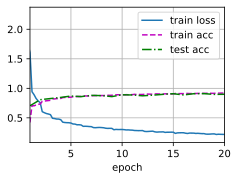

In [5]:
# 1 个 1x1 的卷积层
lr, num_epochs, batch_size = 0.1, 20, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

loss 0.237, train acc 0.913, test acc 0.906
327.3 examples/sec on gpu(0)


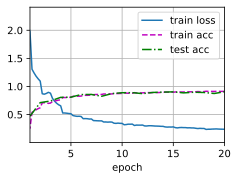

In [9]:
# 2 个 1x1 的卷积层
lr, num_epochs, batch_size = 0.1, 20, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

loss 0.255, train acc 0.906, test acc 0.895
281.4 examples/sec on gpu(0)


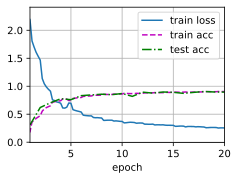

In [13]:
# 3 个 1x1 的卷积层
lr, num_epochs, batch_size = 0.1, 20, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)